In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
train_data = pd.read_csv('train.csv')
train_data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
test_data = pd.read_csv('test.csv')
test_data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [6]:
all_data = pd.concat([train_data,test_data], axis = 0 )
all_data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [7]:
print(len(all_data))

129880


In [8]:
print(len(train_data))

103904


In [9]:
print(len(test_data))

25976


In [10]:
all_data.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [11]:
# Show types of data.
print(all_data['Gender'].unique())
print(all_data['Customer Type'].unique())
print(all_data['Type of Travel'].unique())
print(all_data['Class'].unique())
print(all_data['satisfaction'].unique())

['Male' 'Female']
['Loyal Customer' 'disloyal Customer']
['Personal Travel' 'Business travel']
['Eco Plus' 'Business' 'Eco']
['neutral or dissatisfied' 'satisfied']


# Preprocessing

In [12]:
#Encoded dataset => binary and ordinary
data_encoded = all_data.replace({
    'Gender' :{'Male': 0, 'Female' : 1},
    'Customer Type' :{'Loyal Customer' :0, 'disloyal Customer' :1},
    'Type of Travel' : {'Personal Travel' :0, 'Business travel':1},
    'Class' :{'Eco Plus':0, 'Business': 1, 'Eco': 2},
    'satisfaction' :{'neutral or dissatisfied': 0, 'satisfied' :1}
    
})
data_encoded.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,0,0,13,0,0,460,3,4,...,5,4,3,4,4,5,5,25,18.0,0
1,1,5047,0,1,25,1,1,235,3,2,...,1,1,5,3,1,4,1,1,6.0,0
2,2,110028,1,0,26,1,1,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,3,24026,1,0,25,1,1,562,2,5,...,2,2,5,3,1,4,2,11,9.0,0
4,4,119299,0,0,61,1,1,214,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [13]:
# Droped column not important of data.
data = data_encoded.drop(columns = ['Unnamed: 0', 'id'])

data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,13,0,0,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,0,1,25,1,1,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,1,0,26,1,1,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,1,0,25,1,1,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,0,0,61,1,1,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


## One Hot Encoding

In [14]:
# One hot encoding deals with nominal data.
data_hot_encoding= pd.get_dummies(data)
data_hot_encoding.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,13,0,0,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,0,1,25,1,1,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,1,0,26,1,1,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,1,0,25,1,1,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,0,0,61,1,1,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [15]:
# cleaning data from empty cells
mask = data_hot_encoding.isnull().any(axis=1)
data_preprocess = data_hot_encoding[~mask]


In [16]:
# Calculate number of rows that have Missing values or not have.
num_of_row_with_nan = mask.sum()
total_rows_of_dataset = len(all_data)

# Calculate the percentage of rows have Missing Values.
# If percentage small can delete all rows have Missing Values.
num_of_row_with_nan / total_rows_of_dataset

0.003025870033877425

In [17]:
# Show the data before and after cleaning empty cells.
print(len(data_hot_encoding))
print()
print(len(data_preprocess))

129880

129487


In [18]:
data=data_preprocess
data.dtypes

Gender                                 int64
Customer Type                          int64
Age                                    int64
Type of Travel                         int64
Class                                  int64
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

In [19]:
import warnings
warnings.filterwarnings('ignore')

## Splitting Dataset To Input And Output

In [20]:
features =data.drop(columns =['satisfaction'])
label= data['satisfaction']

In [21]:
features.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,0,13,0,0,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,18.0
1,0,1,25,1,1,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,6.0
2,1,0,26,1,1,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,0.0
3,1,0,25,1,1,562,2,5,5,5,...,2,2,2,5,3,1,4,2,11,9.0
4,0,0,61,1,1,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0,0.0


In [22]:
label.head()

0    0
1    0
2    1
3    0
4    1
Name: satisfaction, dtype: int64

In [23]:
# Splitting dataset to  Training and Testing.
from sklearn.model_selection import train_test_split as split
x_train,x_test,y_train,y_test = split (features , label , test_size=0.20 , random_state=0)


In [24]:
print (x_train.shape)
print (x_test.shape)
print ()
print (y_train.shape)
print (y_test.shape)

(103589, 22)
(25898, 22)

(103589,)
(25898,)


In [25]:
x_train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
41721,1,0,53,1,2,590,3,3,3,3,...,3,3,3,3,3,4,3,2,36,35.0
17159,1,0,58,0,2,630,2,1,2,4,...,3,4,4,2,4,1,4,2,17,4.0
43283,0,0,45,1,1,365,5,5,5,5,...,4,2,2,2,2,5,2,4,0,0.0
76564,1,0,39,1,0,1114,2,2,2,2,...,2,2,2,2,4,2,4,2,0,0.0
61335,1,0,50,1,1,3558,0,0,0,1,...,5,1,1,1,1,3,1,4,0,0.0


In [26]:
# Scaling the dataset to be in the same range.
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

scaler = StandardScaler()

In [27]:
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Evaluate Function

In [28]:
def evaluate_model(model,x_train,y_train,x_test,y_tset):
    
    #train model
    model.fit(x_train,y_train)
    
    #predict values for train & test
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)
    
    # calculate the accuarcy
    acc_train=accuracy_score(y_pred_train,y_train)
    acc_test=accuracy_score(y_pred_test,y_test)
    
    print(model.__class__.__name__)
    print("the train accuracy : ",acc_train)
    print("the test accuracy :",acc_test)
    print("......................")
    return acc_train,acc_test
    

## LogisticRegression Model

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model= LogisticRegression()
acc_train,acc_test =evaluate_model(model,x_train_scaled,y_train,x_test_scaled,y_test)

# Two list have train and accuracy of all model.
acc_train_models = []
acc_test_models = []

# Add accuracy of train and validation to list.
acc_train_models.append(acc_train)
acc_test_models.append(acc_test)

LogisticRegression
the train accuracy :  0.8729305235111836
the test accuracy : 0.8709938991427909
......................


## DecisionTree Model

In [30]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(max_depth = 11, random_state = 2)
acc_train,acc_test =evaluate_model(model,x_train_scaled,y_train,x_test_scaled,y_test)

# Add accuracy of train and validation to list.
acc_train_models.append(acc_train)
acc_test_models.append(acc_test)

DecisionTreeClassifier
the train accuracy :  0.9529776327602352
the test accuracy : 0.946907097073133
......................


In [31]:
# Make for loop to change the deepth of DecisionTree and know what the best result. 
max_depth_values = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
accu_train_values = []
accu_test_values = []

for max_depth in max_depth_values:
    model = DecisionTreeClassifier(max_depth = max_depth, random_state = 2)
    accu_train, accu_test = evaluate_model(model, x_train_scaled,y_train, x_test_scaled,  y_test)
    accu_train_values.append(accu_train)
    accu_test_values.append(accu_test)

DecisionTreeClassifier
the train accuracy :  0.8603712749423201
the test accuracy : 0.8602594794964862
......................
DecisionTreeClassifier
the train accuracy :  0.8843603085269671
the test accuracy : 0.8849331994748629
......................
DecisionTreeClassifier
the train accuracy :  0.8880865728986669
the test accuracy : 0.8904548613792571
......................
DecisionTreeClassifier
the train accuracy :  0.905038179729508
the test accuracy : 0.9052436481581589
......................
DecisionTreeClassifier
the train accuracy :  0.9143828012626823
the test accuracy : 0.9121553787937292
......................
DecisionTreeClassifier
the train accuracy :  0.9258994680902413
the test accuracy : 0.9249749015367982
......................
DecisionTreeClassifier
the train accuracy :  0.9350413653959397
the test accuracy : 0.9339331222488223
......................
DecisionTreeClassifier
the train accuracy :  0.9420208709418953
the test accuracy : 0.9391844930110433
................

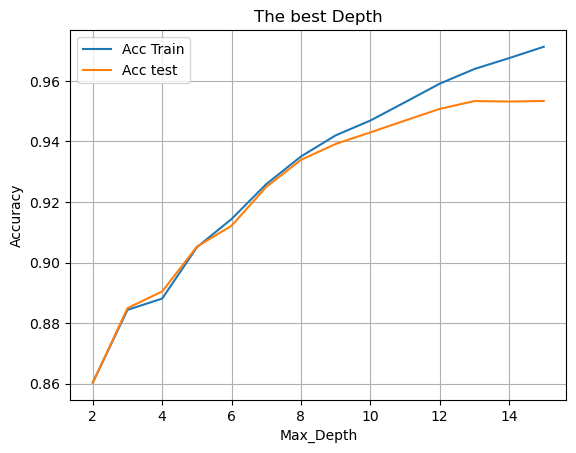

In [32]:
%matplotlib inline

plt.plot(max_depth_values, accu_train_values, label = 'Acc Train')
plt.plot(max_depth_values, accu_test_values, label = 'Acc test')
plt.grid(axis = 'both')
plt.xlabel('Max_Depth')
plt.ylabel('Accuracy')
plt.title('The best Depth')
plt.legend()
plt.show()

## SVC Model

In [33]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear', random_state = 2, C = 0.01)
acc_train,acc_test =evaluate_model(model,x_train_scaled,y_train,x_test_scaled,y_test)

# Add accuracy of train and validation to list.
acc_train_models.append(acc_train)
acc_test_models.append(acc_test)

SVC
the train accuracy :  0.8748129627663169
the test accuracy : 0.8722681288130357
......................


In [34]:
model = SVC(kernel = 'poly', degree = 3, random_state = 2, C = 50)
acc_train,acc_test =evaluate_model(model,x_train_scaled,y_train,x_test_scaled,y_test)

# Add accuracy of train and validation to list.
acc_train_models.append(acc_train)
acc_test_models.append(acc_test)

SVC
the train accuracy :  0.9539140256204809
the test accuracy : 0.9447061549154375
......................


## ٌRandom Forest Model

In [35]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators = 100, max_depth = 11, random_state = 1)
acc_train,acc_test =evaluate_model(model,x_train_scaled,y_train,x_test_scaled,y_test)

# Add accuracy of train and validation to list.
acc_train_models.append(acc_train)
acc_test_models.append(acc_test)

RandomForestClassifier
the train accuracy :  0.9537788761354971
the test accuracy : 0.9483357788246196
......................


In [36]:
max_depth_values = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,16,17,18,19,20]
accu_train_values = []
accu_test_values = []

for max_depth in max_depth_values:
    model = DecisionTreeClassifier(max_depth = max_depth, random_state = 2)
    accu_train, accu_test = evaluate_model(model, x_train_scaled,y_train, x_test_scaled,  y_test)
    accu_train_values.append(accu_train)
    accu_test_values.append(accu_test)

DecisionTreeClassifier
the train accuracy :  0.8603712749423201
the test accuracy : 0.8602594794964862
......................
DecisionTreeClassifier
the train accuracy :  0.8843603085269671
the test accuracy : 0.8849331994748629
......................
DecisionTreeClassifier
the train accuracy :  0.8880865728986669
the test accuracy : 0.8904548613792571
......................
DecisionTreeClassifier
the train accuracy :  0.905038179729508
the test accuracy : 0.9052436481581589
......................
DecisionTreeClassifier
the train accuracy :  0.9143828012626823
the test accuracy : 0.9121553787937292
......................
DecisionTreeClassifier
the train accuracy :  0.9258994680902413
the test accuracy : 0.9249749015367982
......................
DecisionTreeClassifier
the train accuracy :  0.9350413653959397
the test accuracy : 0.9339331222488223
......................
DecisionTreeClassifier
the train accuracy :  0.9420208709418953
the test accuracy : 0.9391844930110433
................

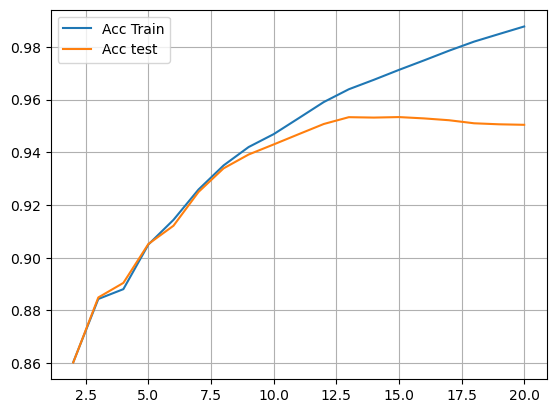

In [37]:
plt.plot(max_depth_values, accu_train_values, label = 'Acc Train')
plt.plot(max_depth_values, accu_test_values, label = 'Acc test' )
plt.grid('both')
plt.legend()
plt.show()

In [38]:
all_result={
    'model':[],
    'train':[],
    'test':[]
}
all_result['model']=['logistic', 'decsion_tree', 'svc_ln', 'svc_poly', 
                        'random_forest']
all_result['train'] = acc_train_models
all_result['test'] = acc_test_models


In [39]:
all_result_df=pd.DataFrame(all_result)
all_result_df

,model,train,test
0,logistic,0.872931,0.870994
1,decsion_tree,0.952978,0.946907
2,svc_ln,0.874813,0.872268
3,svc_poly,0.953914,0.944706
4,random_forest,0.953779,0.948336


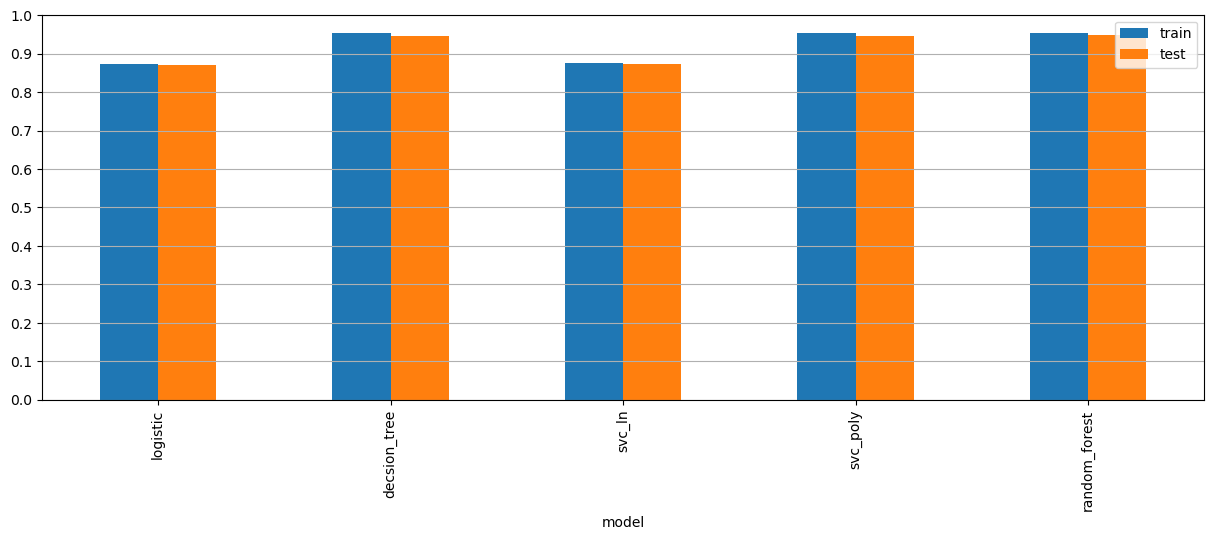

In [40]:
all_result_df.plot.bar(x = 'model', y = ['train', 'test'], figsize = (15, 5))
plt.yticks(np.arange(0.0,1.1,0.1))
plt.grid(axis = 'y')
plt.legend()
plt.show()

In [43]:
# from the digram the best moel is random forest model
best_model=RandomForestClassifier(n_estimators = 100, max_depth = 17, random_state = 1)
best_model.fit(x_train_scaled, y_train)
y_pred_test = best_model.predict(x_test_scaled)

# Calculate accuracy of train and testing.
acc_test = accuracy_score(y_test, y_pred_test)

acc_test

0.9617344968723454

In [45]:
from sklearn.metrics import  confusion_matrix, classification_report
conf_matrix = confusion_matrix(y_test, y_pred_test)

conf_matrix

array([[14346,   328],
       [  663, 10561]], dtype=int64)

<Axes: >

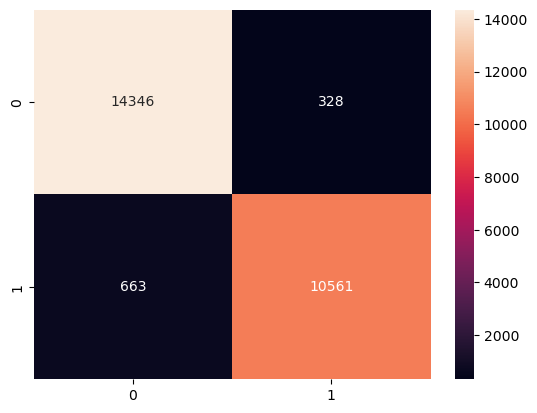

In [46]:
import seaborn as sns
sns.heatmap(conf_matrix, annot = True, fmt = "")